 # Rule Generation to pedict frequent itemsets in Students Data

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
df = pd.read_excel('testew.xlsx')
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
#print(df.head())

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)


C:\Users\pujit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Dividing data in to data frames  based on disciplines

In [2]:
i=0
for discipline, df_discipline in df.groupby('discipline'):
    i=i+1
    exec("df%s = df_discipline" % i)


Feature selection for k-means clustering

In [3]:
X=df1.iloc[:,[6,25]].values

In [6]:
X

array([[ 0.   , 53.   ],
       [ 0.   , 45.   ],
       [ 0.   , 70.   ],
       ...,
       [ 1.   , 28.   ],
       [ 0.941, 70.   ],
       [ 0.   , 71.   ]])

Retrieving dimmensions of parameters

In [7]:
m= X.shape[0]
n= X.shape[1]

Initializing Centroids

In [8]:
Centroids=np.array([]).reshape(n,0) 


In [9]:
Centroids

array([], shape=(2, 0), dtype=float64)

Initializing K

In [12]:
K=4

K-means Clustering

In [13]:
import random as rd
for i in range(5):
    rand=rd.randint(0,m-1)
    print(X[rand])
    Centroids=np.c_[Centroids,X[rand]]


[ 0. 63.]
[ 0. 70.]
[ 0. 63.]
[ 0. 71.]
[ 0. 63.]


K-means Clustering

In [18]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(5):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

     Number of iterations

In [19]:
n_iter=100


    Centroid Calculation in K-Means Clustering

In [20]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m): 
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

    Convergence of K-Means Clustering

In [21]:
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
    Y={}
    for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
          Y[k+1]=Y[k+1].T
    
    for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

    Clusters

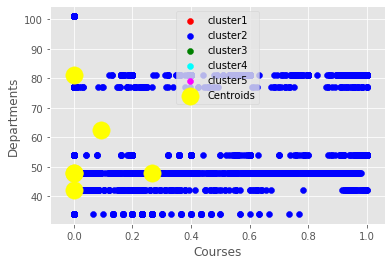

In [22]:
import matplotlib. pyplot as plt
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Courses')
plt.ylabel('Departments')
plt.legend()
plt.show()

    Data Preprocessing to generate transactions similar to market baskets

In [23]:
import pandas as pd
import numpy as np
grouped = df1.groupby(['userid_DI'])

def merger(group):
    nr_cols = [col for col in group.columns if 'course_id_DI' in col]
    values = [group[col].values for col in nr_cols]
    new_row = pd.Series()
    i = 1
    for row in values:
        for nr in row:
            if not np.isnan(nr):
                new_row['course_id_DI_{}'.format(i)] = nr
                i += 1
    return new_row

merged = grouped.apply(merger).unstack().reset_index()

     Sample Record of transactions

In [24]:
merged.dropna()

,userid_DI,course_id_DI_1,course_id_DI_2,course_id_DI_3,course_id_DI_4,course_id_DI_5,course_id_DI_6
8975,832459440,832945284.0,832945184.0,832945289.0,832945503.0,832945577.0,832960906.0
9280,832471257,832945805.0,832945503.0,832945824.0,832945289.0,832945184.0,832945284.0
16212,832914418,832945824.0,832945805.0,832945284.0,832945289.0,832945184.0,832945503.0
16399,832923092,832945824.0,832945805.0,832945289.0,832945184.0,832945503.0,832960906.0
17152,832960308,832945284.0,832945824.0,832945289.0,832945577.0,832945503.0,832945184.0
17551,832965373,832945824.0,832945805.0,832945289.0,832945184.0,832945284.0,832945503.0


In [25]:
m1=merged.set_index('userid_DI').T.to_dict('list')


    Data Processing to remove nan values

In [26]:
res = {k:[elem for elem in v if elem is not np.nan] for k,v in m1.items()}


In [27]:
res

{832300008: [832960058.0, nan, nan, nan, nan, nan],
 832300264: [832960058.0, nan, nan, nan, nan, nan],
 832300399: [832960906.0, nan, nan, nan, nan, nan],
 832300628: [832960058.0, nan, nan, nan, nan, nan],
 832300894: [832960058.0, nan, nan, nan, nan, nan],
 832300936: [832960906.0, nan, nan, nan, nan, nan],
 832300941: [832960058.0, nan, nan, nan, nan, nan],
 832301238: [832960058.0, nan, nan, nan, nan, nan],
 832301490: [832960906.0, nan, nan, nan, nan, nan],
 832301546: [832960906.0, nan, nan, nan, nan, nan],
 832301945: [832960906.0, nan, nan, nan, nan, nan],
 832302466: [832960058.0, nan, nan, nan, nan, nan],
 832302500: [832960058.0, nan, nan, nan, nan, nan],
 832303048: [832960058.0, nan, nan, nan, nan, nan],
 832303219: [832960058.0, nan, nan, nan, nan, nan],
 832303293: [832960058.0, nan, nan, nan, nan, nan],
 832303634: [832960058.0, nan, nan, nan, nan, nan],
 832303705: [832960058.0, nan, nan, nan, nan, nan],
 832303835: [832960058.0, nan, nan, nan, nan, nan],
 832304125: 

In [28]:
m12={}

In [29]:
import math
for k,v in m1.items():
    m1[k] = [x for x in m1[k] if not (isinstance(x, float) and math.isnan(x))]

In [30]:
for k,v in m1.items():
    if(len(v)>1):
        m12[k] = v

In [31]:
from apyori import apriori

In [32]:
m12

{832315941: [832960906.0, 832960058.0],
 832318220: [832960906.0, 832960058.0],
 832318426: [832960906.0, 832960058.0],
 832331438: [832960906.0, 832960058.0],
 832340735: [832960906.0, 832960058.0],
 832357829: [832960906.0, 832960058.0],
 832359010: [832960058.0, 832960906.0],
 832365003: [832960058.0, 832960906.0],
 832400188: [832945824.0, 832945503.0],
 832400196: [832945284.0, 832945289.0],
 832400510: [832945503.0, 832960058.0],
 832400583: [832945289.0, 832945284.0],
 832401310: [832945824.0, 832960906.0],
 832401490: [832945184.0, 832945824.0],
 832401745: [832945824.0, 832945805.0],
 832402182: [832945184.0, 832945503.0],
 832402201: [832945824.0, 832945184.0],
 832402505: [832945503.0, 832945184.0],
 832402776: [832945824.0, 832945503.0],
 832402872: [832945805.0, 832945824.0],
 832403585: [832945824.0, 832945503.0],
 832403604: [832945503.0, 832945824.0],
 832403654: [832945824.0, 832945289.0],
 832403822: [832945824.0, 832945184.0],
 832403973: [832945289.0, 832945284.0],


In [33]:
from mlxtend.frequent_patterns import apriori, association_rules


In [34]:
records=[]
for key,v in m12.items():
    records.append(v)

In [35]:
records

[[832960906.0, 832960058.0],
 [832960906.0, 832960058.0],
 [832960906.0, 832960058.0],
 [832960906.0, 832960058.0],
 [832960906.0, 832960058.0],
 [832960906.0, 832960058.0],
 [832960058.0, 832960906.0],
 [832960058.0, 832960906.0],
 [832945824.0, 832945503.0],
 [832945284.0, 832945289.0],
 [832945503.0, 832960058.0],
 [832945289.0, 832945284.0],
 [832945824.0, 832960906.0],
 [832945184.0, 832945824.0],
 [832945824.0, 832945805.0],
 [832945184.0, 832945503.0],
 [832945824.0, 832945184.0],
 [832945503.0, 832945184.0],
 [832945824.0, 832945503.0],
 [832945805.0, 832945824.0],
 [832945824.0, 832945503.0],
 [832945503.0, 832945824.0],
 [832945824.0, 832945289.0],
 [832945824.0, 832945184.0],
 [832945289.0, 832945284.0],
 [832945503.0, 832945824.0],
 [832945289.0, 832945284.0],
 [832945284.0, 832945824.0, 832945503.0],
 [832945824.0, 832945503.0],
 [832945284.0, 832945184.0],
 [832945824.0, 832945503.0],
 [832945824.0, 832945289.0],
 [832945805.0, 832945503.0],
 [832945824.0, 832960906.0],
 

In [36]:
df1=pd.DataFrame.from_dict(m12, orient='index')

    Generating frequent itemsets

In [37]:
items = (df['course_id_DI'].unique())

In [38]:
encoded_vals = []
for index, row in df1.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [39]:
freq_items = apriori(ohe_df, min_support=0.009, use_colnames=True, verbose=1)


Processing 5 combinations | Sampling itemset size 5


    Frequent Itemsets and their support values

In [40]:
freq_items

,support,itemsets
0,0.256891,(832945184.0)
1,0.386990,(832945284.0)
2,0.270121,(832945289.0)
3,0.454245,(832945503.0)
4,0.051819,(832945577.0)
5,0.189636,(832945805.0)
6,0.457552,(832945824.0)
7,0.095921,(832960058.0)
8,0.101433,(832960906.0)
9,0.098126,"(832945184.0, 832945284.0)"


    Generating Rules

In [41]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.01, support_only=False)

    Rule Generation with antecedents, Consequents and their suppot, confidence and lift values

In [42]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(832945184.0),(832945284.0),0.256891,0.386990,0.098126,0.381974,0.987039,-0.001289,0.991884
1,(832945284.0),(832945184.0),0.386990,0.256891,0.098126,0.253561,0.987039,-0.001289,0.995539
2,(832945184.0),(832945289.0),0.256891,0.270121,0.057332,0.223176,0.826207,-0.012060,0.939568
3,(832945289.0),(832945184.0),0.270121,0.256891,0.057332,0.212245,0.826207,-0.012060,0.943325
4,(832945184.0),(832945503.0),0.256891,0.454245,0.138920,0.540773,1.190487,0.022228,1.188420
5,(832945503.0),(832945184.0),0.454245,0.256891,0.138920,0.305825,1.190487,0.022228,1.070493
6,(832945184.0),(832945577.0),0.256891,0.051819,0.018743,0.072961,1.407999,0.005431,1.022806
7,(832945577.0),(832945184.0),0.051819,0.256891,0.018743,0.361702,1.407999,0.005431,1.164204
8,(832945184.0),(832945805.0),0.256891,0.189636,0.017641,0.068670,0.362112,-0.031075,0.870114
9,(832945805.0),(832945184.0),0.189636,0.256891,0.017641,0.093023,0.362112,-0.031075,0.819325


In [43]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

C:\Users\pujit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\pujit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


    Plot between support and confidence

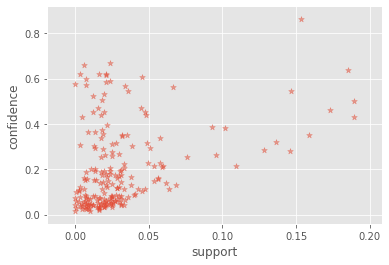

In [44]:
import random
import matplotlib.pyplot as plt
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

    Plot between lift and confidence

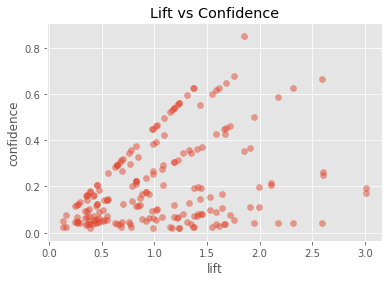

In [45]:
plt.scatter(rules['lift'], rules['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()

In [46]:
import networkx as nx  
import networkx as nx
import matplotlib as plt
import matplotlib.pyplot as plty
from matplotlib import font_manager
plt.font_manager._rebuild()
G1 = nx.DiGraph()
def draw_graph(rules, rules_to_show):
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
                G1.add_nodes_from([a])
                G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        
        for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    pos=nx.spring_layout(G1, dim=2, k=0.4, pos=None, fixed=None, iterations=50, scale=1.0)    
    for p in pos:  # raise text positions
           pos[p][1] += 0.07
    nx.draw_networkx(G1,pos,node_color = color_map,with_labels = True,font_size= 3)
    plty.figure(3,figsize=(12,12)) 
    plty.show()

C:\Users\pujit\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\pujit\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


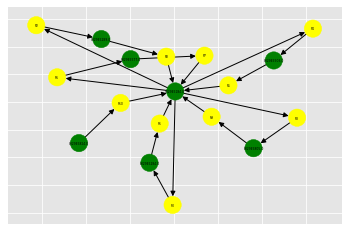

<Figure size 864x864 with 0 Axes>

In [47]:
draw_graph(rules, 11)

In [55]:
import matplotlib.pyplot as plt
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes with degree k')
    plt.title('Degree Distribution')  
    plt.show()



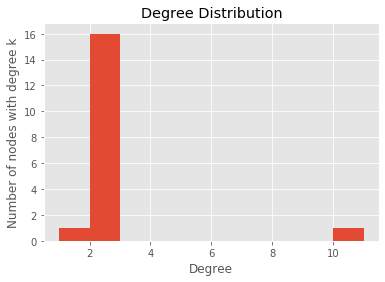

In [56]:
plot_degree_dist(G1)

In [ ]:
import networkx as nx
import numpy as np
import re
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
G=nx.Graph()
nodes=[]
edge=[]
adjList={}
b=[]
df1 = pd.read_excel('Emails.xlsx', sheetname='Sheet1')
dfToList = df1['Source'].tolist()
nodes = list(dict.fromkeys(dfToList))
edge = df1.values.tolist()
G.add_nodes_from(nodes)
G.add_edges_from(edge)
for i in G.nodes():
    for j in G.nodes():
        if G.has_edge(i,j):
            b.append(j)
    adjList[i]=b
    b=[]
